In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics #

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mhmmd-nauman/DataSets/master/wdbc/dsbc/csv/breast-cancer%20-%20complete.csv")

print(df.head)

<bound method NDFrame.head of        Age menopause tumor-size inv-nodes  ... breast  breast-quad irradiat Class
0    30-39   premeno      30-34       0-2  ...   left     left_low       no     B
1    40-49   premeno      20-24       0-2  ...  right     right_up       no     B
2    40-49   premeno      20-24       0-2  ...   left     left_low       no     B
3    60-69      ge40      15-19       0-2  ...  right      left_up       no     B
4    40-49   premeno        0-4       0-2  ...  right    right_low       no     B
..     ...       ...        ...       ...  ...    ...          ...      ...   ...
281  30-39   premeno      30-34       0-2  ...   left      left_up       no     M
282  30-39   premeno      20-24       0-2  ...   left      left_up      yes     M
283  60-69      ge40      20-24       0-2  ...  right      left_up       no     M
284  40-49      ge40      30-34       3-5  ...   left     left_low       no     M
285  50-59      ge40      30-34       3-5  ...   left     left_low  

In [ ]:
#df=df[df.columns[:-1]]

In [ ]:
df.head()

,Age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,B
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,B
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,B
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,B
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,B


In [ ]:
#df['Application Status'] = df['Application Status'].map({'Complete':1,'NotComplete':0})
#df['Offered'] = df['Offered'].map({'Yes':1,'No':0})
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
df['Age'] = labelencoder_X_1.fit_transform(df['Age'])
df['menopause'] = labelencoder_X_1.fit_transform(df['menopause'])
df['tumor-size'] = labelencoder_X_1.fit_transform(df['tumor-size'])
df['inv-nodes'] = labelencoder_X_1.fit_transform(df['inv-nodes'])
df['node-caps'] = labelencoder_X_1.fit_transform(df['node-caps'])

df['deg-malig'] = labelencoder_X_1.fit_transform(df['deg-malig'])
df['breast'] = labelencoder_X_1.fit_transform(df['breast'])

df['breast-quad'] = labelencoder_X_1.fit_transform(df['breast-quad'])
df['irradiat'] = labelencoder_X_1.fit_transform(df['irradiat'])
df['Class'] = labelencoder_X_1.fit_transform(df['Class'])

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
df = clean_dataset(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


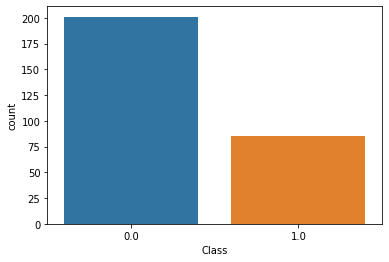

In [ ]:
sns.countplot(df['Class'],label="Count")

In [ ]:
df.columns[0:8]

Index(['Age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad'],
      dtype='object')

In [ ]:
#prediction_var = ['Application Status','SSC','Admission Test','Terminal Degree','Document Verified','Domicile','Gender','Province','English Marks']

In [ ]:
train, test = train_test_split(df, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(200, 10)
(86, 10)


In [ ]:
data_df= list(df.columns[0:8]) 
data_df_main = df.loc[:,data_df]

In [ ]:
train_X = train[df.columns[0:8]]# taking the training data input 
train_y=train.Class# This is output of our training data
# same we have to do for test
test_X= test[df.columns[0:8]] # taking test data inputs
test_y =test.Class   #output value of test dat
y_test = test_y

In [ ]:
model=RandomForestClassifier(n_estimators=100)

In [ ]:
model.fit(train_X,train_y)# 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=model.predict(test_X)

In [ ]:
metrics.accuracy_score(y_pred,y_test)

0.6627906976744186

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sp = tn / (tn+fp)
Sn = tp/(tp + fn)

In [ ]:
print(cm)
print(Sp)
print(Sn)

[[50  8]
 [21  7]]
0.8620689655172413
0.25


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, y_pred)
print(cohen_score)

0.1273617914625611
